# <span style="color:teal">RBFE Network - Analysis</span>


In [1]:
# import libraries
import BioSimSpace as BSS
from scipy.stats import sem as sem
import sys
import os
import glob

if '/home/anna/Documents/cinnabar' not in sys.path:
    sys.path.insert(1, '/home/anna/Documents/cinnabar')
import cinnabar

print("adding code to the pythonpath...")
code = '/home/anna/Documents/code/python'
if code not in sys.path:
    sys.path.insert(1, code)
import pipeline

print(cinnabar.__file__)

from pipeline import *
from pipeline.utils import validate
from pipeline.analysis import *

Warning on use of the timeseries module: If the inherent timescales of the system are long compared to those being analyzed, this statistical inefficiency may be an underestimate.  The estimate presumes the use of many statistically independent samples.  Tests should be performed to assess whether this condition is satisfied.   Be cautious in the interpretation of the data.
/home/anna/anaconda3/envs/biosimspace-dev/lib/python3.9/site-packages/numpy/core/getlimits.py:500: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/anna/anaconda3/envs/biosimspace-dev/lib/python3.9/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)
/home/anna/anaconda3/envs/biosimspace-dev/lib/python3.9/site-packages/numpy/core/getlimits.py:500: UserWarning: The value of the smallest 


Sending anonymous Sire usage statistics to http://siremol.org.
For more information, see http://siremol.org/analytics
To disable, set the environment variable 'SIRE_DONT_PHONEHOME' to 1
To see the information sent, set the environment variable 
SIRE_VERBOSE_PHONEHOME equal to 1. To silence this message, set
the environment variable SIRE_SILENT_PHONEHOME to 1.

adding code to the pythonpath...
/home/anna/Documents/cinnabar/cinnabar/__init__.py


In [2]:
bench_folder = f"/home/anna/Documents/benchmark"
protein = "mcl1"
main_dir = f"{bench_folder}/extracted/{protein}"

# choose location for the files
net_file = f"{main_dir}/execution_model/network_lomap.dat"
ana_file = f"{main_dir}/execution_model/analysis_protocol.dat"
exp_file = f"{bench_folder}/inputs/experimental/{protein}.yml"

if os.path.exists(f"{main_dir}/outputs_extracted/results"):
    results_folder = f"{main_dir}/outputs_extracted/results"
elif os.path.exists(f"{main_dir}/outputs/results"):
    results_folder = f"{main_dir}/outputs/results"
else:
    raise ValueError(f"results directory not found in the {main_dir}. please make sure results were written using the analysis script previously in the pipeline")

output_folder = validate.folder_path(f"{main_dir}/analysis", create=True)


In [11]:
all_analysis_object = analysis_network(results_folder,
                                       exp_file=exp_file,
                                       net_file=net_file,
                                       output_folder=output_folder,
                                       analysis_ext=ana_file
                                        )

# can add any other results files
# all_analysis_object.compute_other_results(file_name=None, name=None)
all_analysis_object.compute(cycle_closure=False)

Graph is not connected enough to compute absolute values
lig_33 value not computed. cannot add to dictionary
lig_59 value not computed. cannot add to dictionary
lig_38 value not computed. cannot add to dictionary
lig_30 value not computed. cannot add to dictionary
lig_40 value not computed. cannot add to dictionary
lig_27 value not computed. cannot add to dictionary
lig_29 value not computed. cannot add to dictionary
lig_45 value not computed. cannot add to dictionary
lig_28 value not computed. cannot add to dictionary
lig_46 value not computed. cannot add to dictionary
lig_44 value not computed. cannot add to dictionary
lig_31 value not computed. cannot add to dictionary
lig_36 value not computed. cannot add to dictionary
lig_34 value not computed. cannot add to dictionary
lig_48 value not computed. cannot add to dictionary
lig_32 value not computed. cannot add to dictionary
lig_23 value not computed. cannot add to dictionary
lig_26 value not computed. cannot add to dictionary
lig_65 

There are different options for plotting:
bar (pert or lig)
scatter (pert or lig) - can be plotted using cinnabar
eng vs eng
other results (eg from other workflows)
outliers
histograms (for the error of the runs, sem, legs)

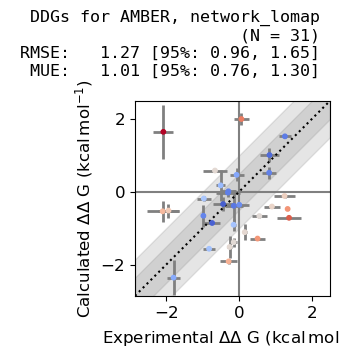

In [14]:
all_analysis_object.plot_scatter_pert(use_cinnabar=True, engine="AMBER")

In [ ]:
# bar
all_analysis_object.plot_bar_lig()
all_analysis_object.plot_bar_pert()

#scatter
all_analysis_object.plot_scatter_lig()
all_analysis_object.plot_scatter_pert()
all_analysis_object.plot_scatter_lig(use_cinnabar=True)
all_analysis_object.plot_scatter_pert(use_cinnabar=True)
for eng in all_analysis_object.engines:
    all_analysis_object.plot_scatter_lig(engine=eng)
    all_analysis_object.plot_scatter_pert(engine=eng)

    # outliers
    all_analysis_object.plot_outliers(engine=eng)
    all_analysis_object.plot_outliers(engine=eng, pert_val="val")

all_analysis_object.plot_histogram_legs(free_bound="free")
all_analysis_object.plot_histogram_legs(free_bound="bound")
all_analysis_object.plot_histogram_runs()
all_analysis_object.plot_histogram_sem()
all_analysis_object.plot_histogram_sem(pert_val="pert")

for additional analyses:
calculate the mae
fwf stuff

In [ ]:
all_analysis_object.calc_mae(pert_val="pert")
all_analysis_object.calc_mae(pert_val="val")

plot other results

Graph is not connected enough to compute absolute values
lig_27 value not computed. cannot add to dictionary
lig_40 value not computed. cannot add to dictionary
lig_33 value not computed. cannot add to dictionary
lig_38 value not computed. cannot add to dictionary
lig_45 value not computed. cannot add to dictionary
lig_29 value not computed. cannot add to dictionary
lig_42 value not computed. cannot add to dictionary
lig_44 value not computed. cannot add to dictionary
lig_48 value not computed. cannot add to dictionary
lig_34 value not computed. cannot add to dictionary
lig_46 value not computed. cannot add to dictionary
lig_30 value not computed. cannot add to dictionary
lig_31 value not computed. cannot add to dictionary
lig_26 value not computed. cannot add to dictionary
lig_65 value not computed. cannot add to dictionary
lig_67 value not computed. cannot add to dictionary
lig_28 value not computed. cannot add to dictionary
lig_35 value not computed. cannot add to dictionary
lig_36 

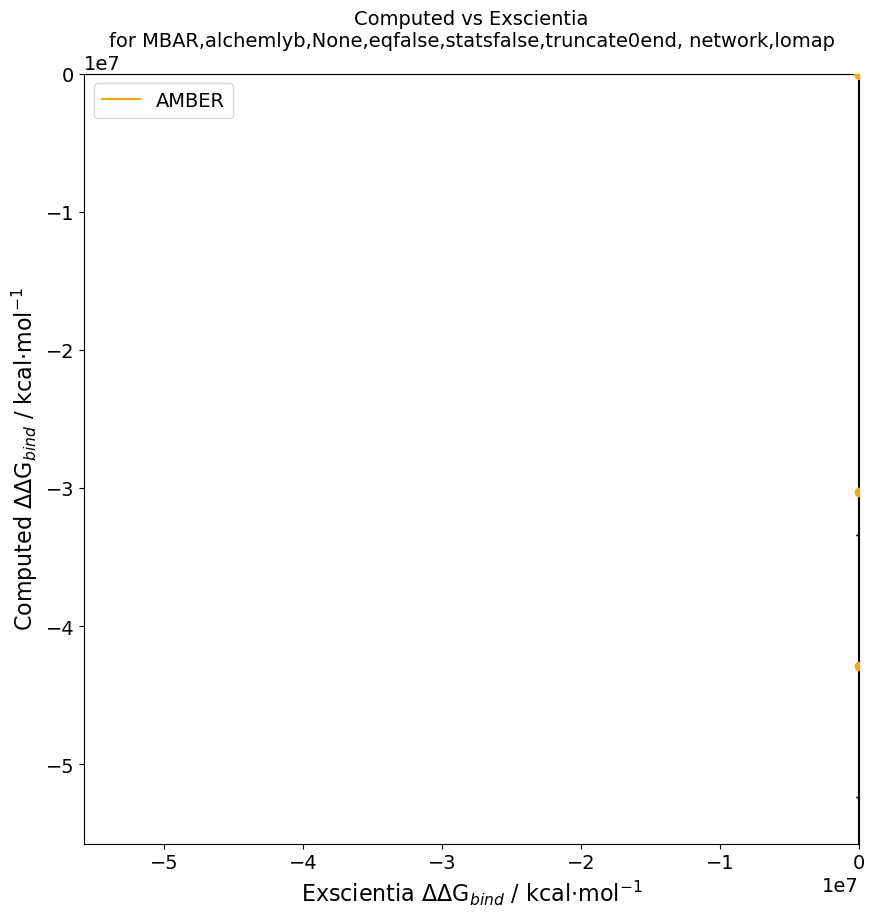

In [12]:
other_results = glob.glob("/home/anna/Documents/benchmark/inputs/other_computed/exscentia/*_exscentia_mcl1.csv")
all_analysis_object.compute_other_results(other_results, name="Exscientia")
all_analysis_object.plot_other_results(name="Exscientia", engine="AMBER", pert_val="pert")

plot convergence

In [ ]:
ex_outputs_folder = f"{main_dir}/outputs_extracted"

converg_obj = plot_convergence(ex_outputs_folder,
                               perturbations=all_analysis_object.perturbations,
                               engines=all_analysis_object.engines,
                               file_ext=file_ext
                               )

converg_obj.plot_convergence_all()

remove a perturbation

['lig_33~lig_45', 'lig_37~lig_67', 'lig_29~lig_33', 'lig_60~lig_67', 'lig_60~lig_65']


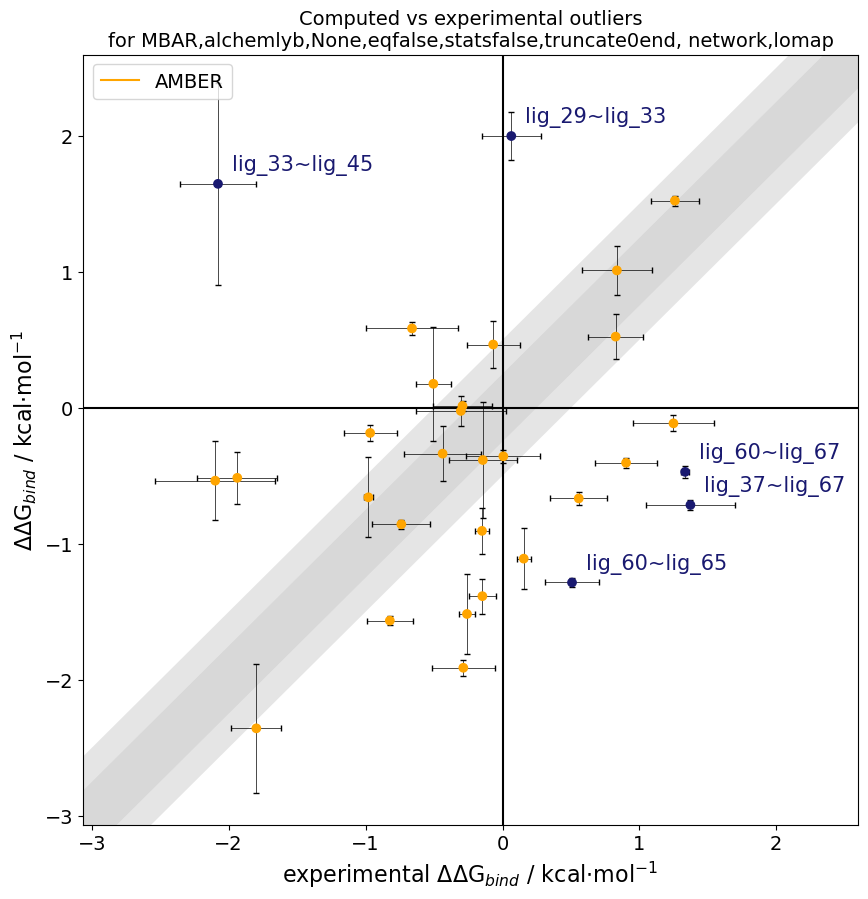

['lig_33~lig_45', 'lig_33~lig_38', 'lig_27~lig_29', 'lig_56~lig_58', 'lig_32~lig_33']


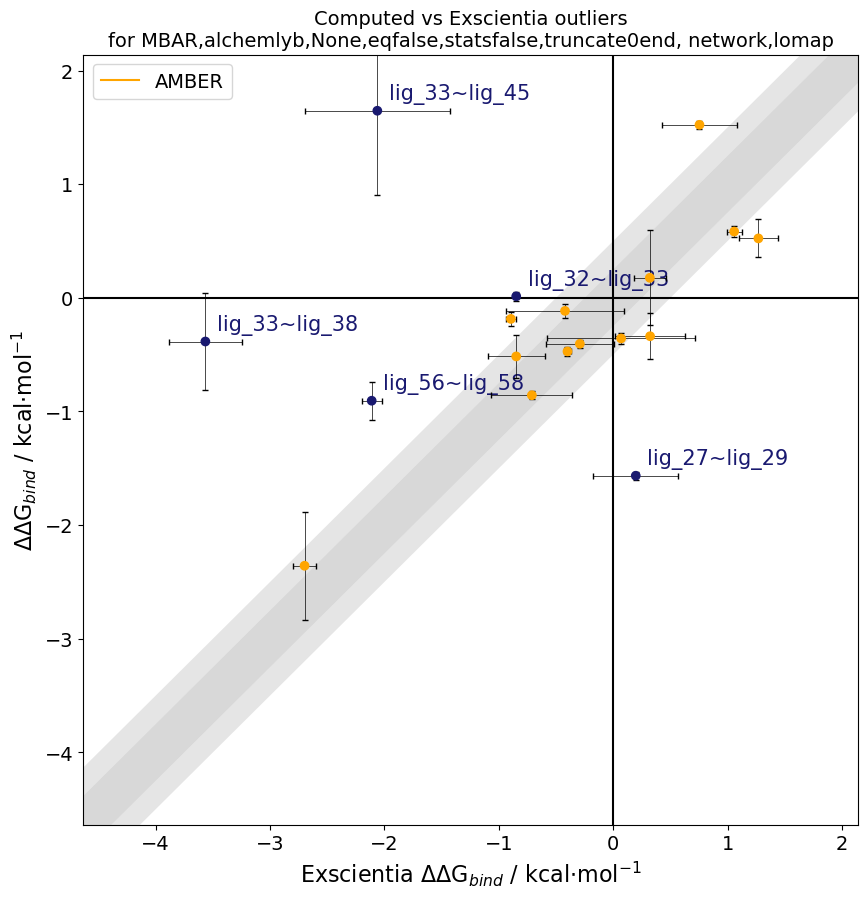

In [10]:
# check which perturbations are outliers
all_analysis_object.plot_outliers(engine="AMBER", outliers=5, pert_val="pert")
all_analysis_object._plotting_object.outlier(engines="AMBER", outliers=5, name="Exscientia")

In [ ]:
all_analysis_object.cinnabar_calc_pert_dict["AMBER"]

In [ ]:
all_analysis_object.calc_pert_dict["AMBER"]

In [7]:
all_analysis_object._plotting_object.freenrg_df_dict["Exscientia"]["AMBER"]["pert"]

,freenrg_Exscientia,err_Exscientia,freenrg_calc,err_calc
lig_33~lig_38,-3.565420,0.320062,-3.843000e-01,4.279876e-01
lig_33~lig_45,-2.062126,0.631389,1.646033e+00,7.422265e-01
lig_33~lig_44,-2.698235,0.098597,-2.357267e+00,4.765199e-01
lig_33~lig_34,0.068980,0.649194,-3.571667e-01,4.619373e-02
lig_33~lig_35,-0.847910,0.247183,-5.154667e-01,1.912358e-01
lig_27~lig_38,-3.567452,0.677470,-3.025150e+07,3.025150e+07
lig_27~lig_29,0.197037,0.371529,-1.565200e+00,3.490000e-02
lig_27~lig_48,4.009670,0.570705,-4.287400e+07,9.481318e+06
lig_27~lig_28,0.320274,0.137605,1.759500e-01,4.177500e-01
lig_32~lig_33,-0.848042,0.022497,1.336667e-02,3.755291e-02


Graph is not connected enough to compute absolute values
lig_33 value not computed. cannot add to dictionary
lig_59 value not computed. cannot add to dictionary
lig_38 value not computed. cannot add to dictionary
lig_29 value not computed. cannot add to dictionary
lig_45 value not computed. cannot add to dictionary
lig_27 value not computed. cannot add to dictionary
lig_28 value not computed. cannot add to dictionary
lig_46 value not computed. cannot add to dictionary
lig_44 value not computed. cannot add to dictionary
lig_31 value not computed. cannot add to dictionary
lig_36 value not computed. cannot add to dictionary
lig_34 value not computed. cannot add to dictionary
lig_32 value not computed. cannot add to dictionary
lig_23 value not computed. cannot add to dictionary
lig_26 value not computed. cannot add to dictionary
lig_65 value not computed. cannot add to dictionary
lig_67 value not computed. cannot add to dictionary
lig_35 value not computed. cannot add to dictionary
lig_37 

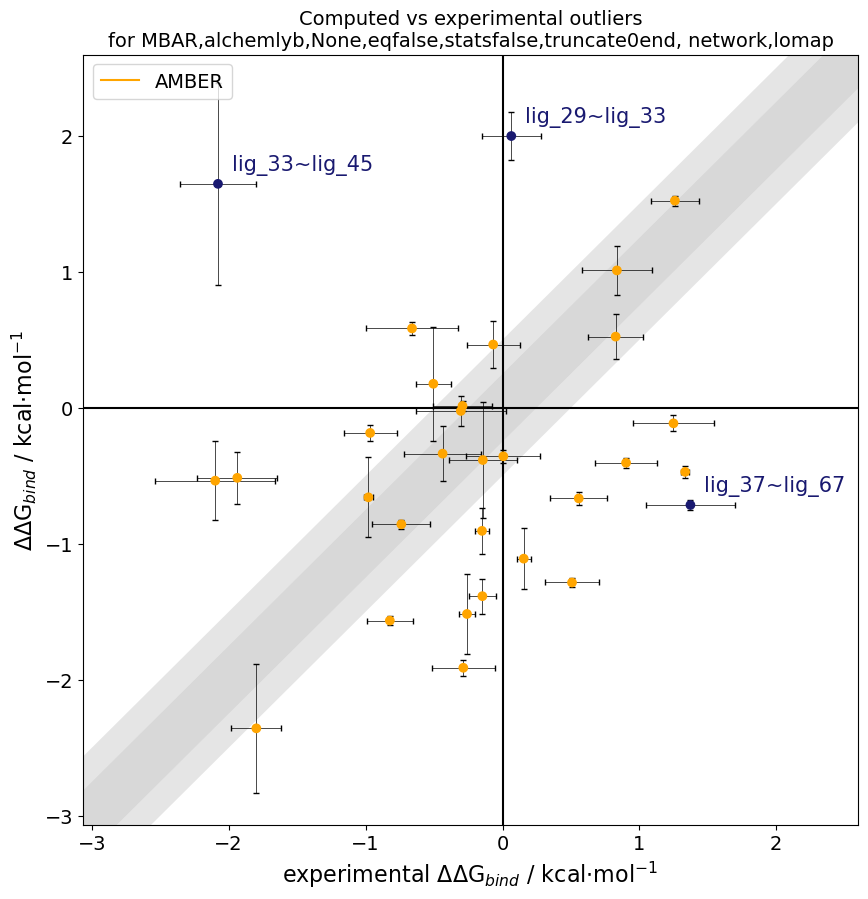

In [13]:
eng = "AMBER"
perturbations = ['lig_27~lig_48','lig_27~lig_38', 'lig_30~lig_40'] #
# ['lig_ejm42~lig_ejm44', 'lig_ejm42~lig_ejm49', 'lig_ejm42~lig_ejm45']
# ['lig_ejm42~lig_ejm49', 'lig_ejm45~lig_ejm55', 'lig_ejm43~lig_ejm50'] #gromacs
# ['lig_ejm45~lig_ejm53', 'lig_ejm44~lig_ejm45', 'lig_ejm31~lig_ejm49'] #somd

for pert in perturbations:
    try:
        all_analysis_object.remove_perturbations(pert)
    except:
        pass
    

all_analysis_object.compute()

# plot scatter plots
# all_analysis_object.plot_scatter_lig(engine=eng, use_cinnabar=True)
# all_analysis_object.plot_scatter_pert(engine="AMBER", use_cinnabar=True)
all_analysis_object.plot_outliers(engine=eng, outliers=3, pert_val="pert")

In [ ]:
# import networkanalysis
# import experiments
# import stats

# exp_dicts = res_obj._get_exp_fwf(fwf_path='/home/anna/Documents/september_2022_workshops/freenrgworkflows/networkanalysis/')
# for key in exp_dicts[0]:
#     print(f"{key} : {exp_dicts[0][key][0]}, {exp_dicts[0][key][1]}")

free_fwf_dict = res_obj._get_ana_fwf(fwf_path='/home/anna/Documents/september_2022_workshops/freenrgworkflows/networkanalysis/', engine="SOMD")
for key in free_fwf_dict:
    print(f"{key} : {free_fwf_dict[key][0]}, {free_fwf_dict[key][1]}")

# fwf_stats = res_obj._get_stats_fwf(fwf_path='/home/anna/Documents/september_2022_workshops/freenrgworkflows/networkanalysis/', engine="SOMD")
